## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Juan Ignacio
- Apellido: Elbaum Feldman
- Legajo: 1682921

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [81]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [15]:
diab = pd.read_csv(r'C:\Users\juan2\Ciencia de Datos\clusterai_2022-main\clusterai_2022-main\TP1 Ciencia de Datos\ClusterAI_TP_dataset_diabetes.csv')

In [16]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [17]:
diab.shape

(768, 9)

In [18]:
print(f'La dimensión del dataset es: {np.shape(diab)}')

La dimensión del dataset es: (768, 9)


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [19]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [20]:
diab.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [21]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

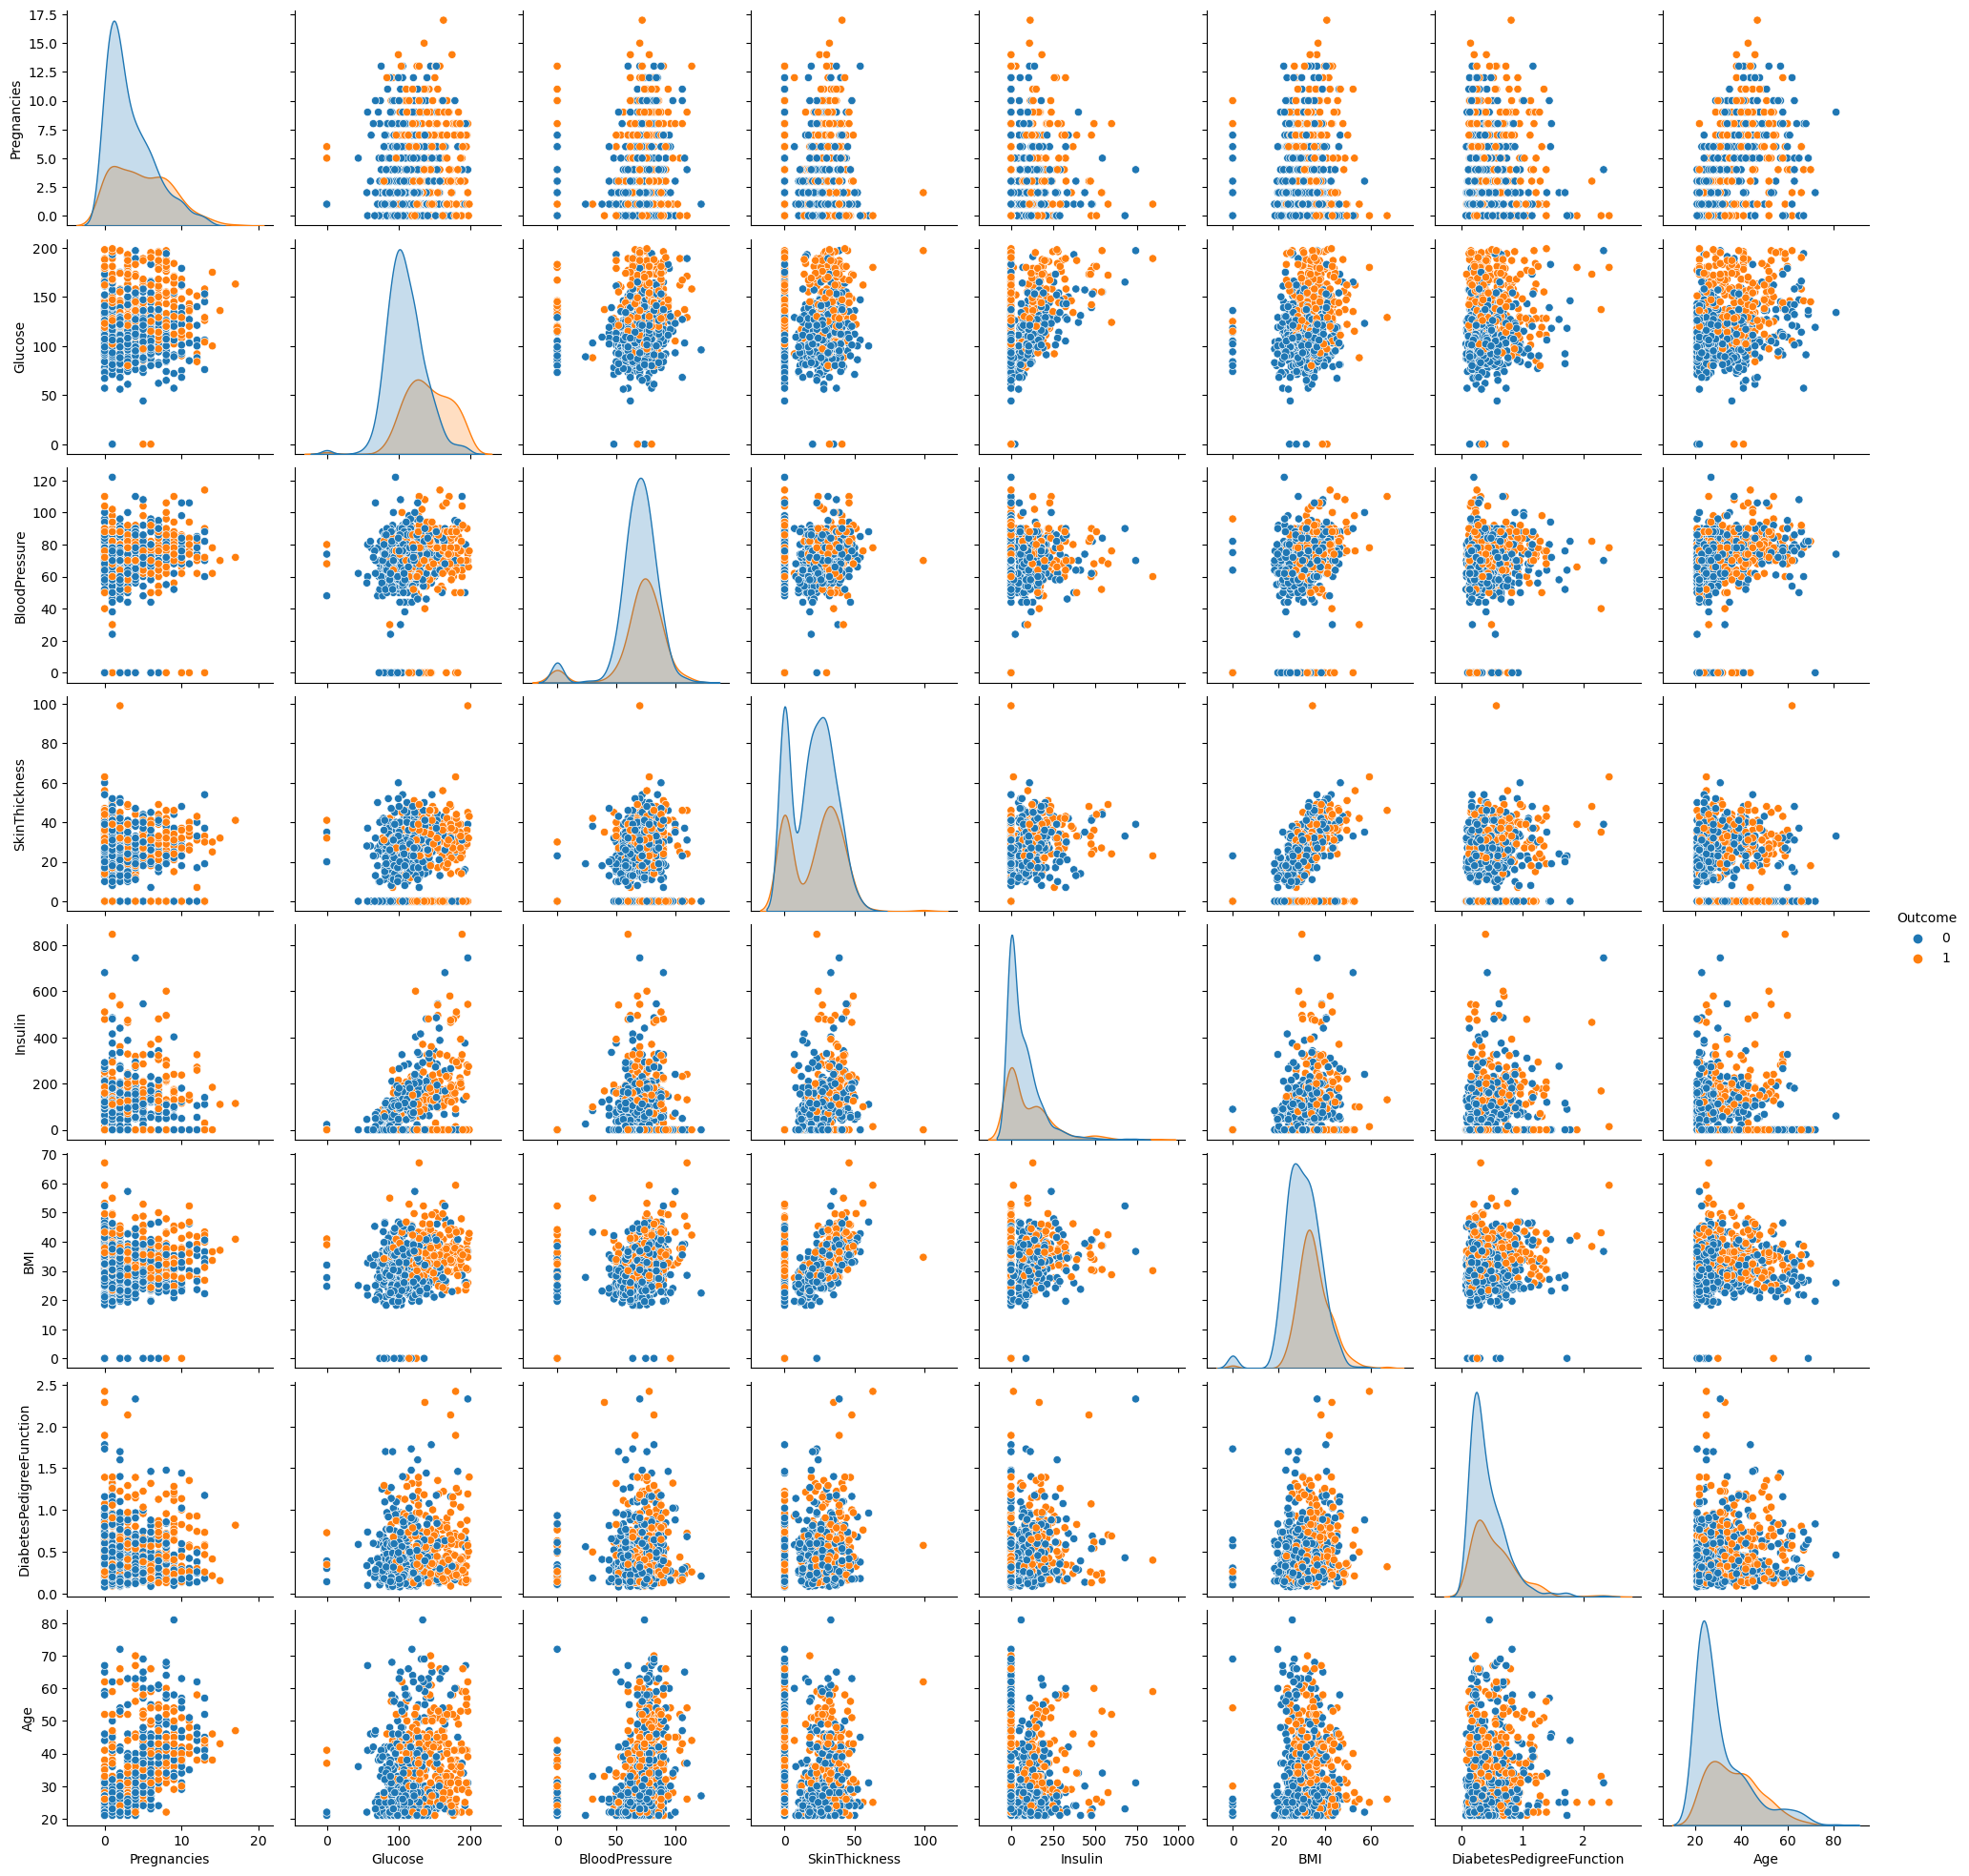

In [22]:
sns.pairplot(diab, hue = 'Outcome')
plt.show()
#Se observa una clara línea de corte en la variable Outcome de acuerdo con los niveles de glucosa de la muestra de pacientes.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? Age-Pregnancies (0,54) y SkinThinckness-Insulin (0,44) y ambos tienen una correlación positiva
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál? Estar atentos a aquellos pacientes con mayor SkinThickness porque tienen mayor probabilidad de tener alta insulina

In [23]:
diab_corr = diab.corr()
diab_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


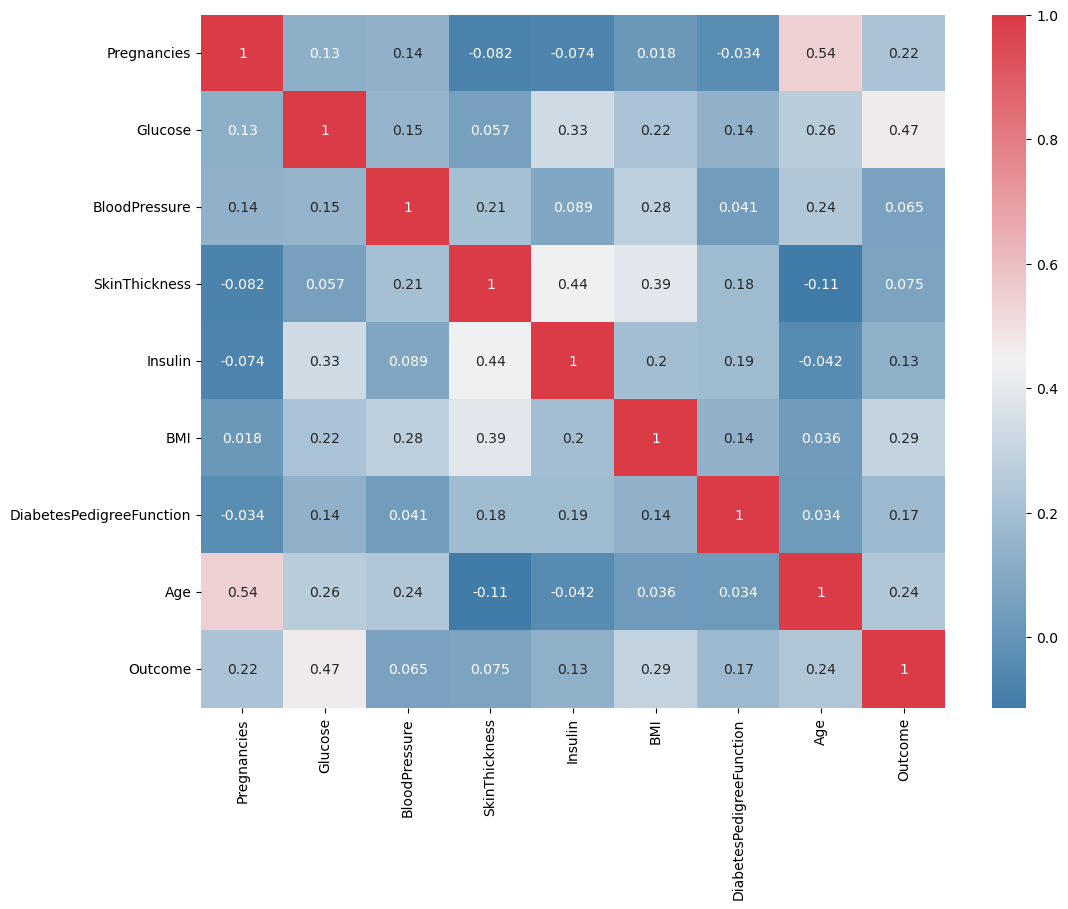

In [24]:
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(diab_corr,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))
plt.show()

##### **Objetivo 8**
Hacer un histograma de la variable BMI

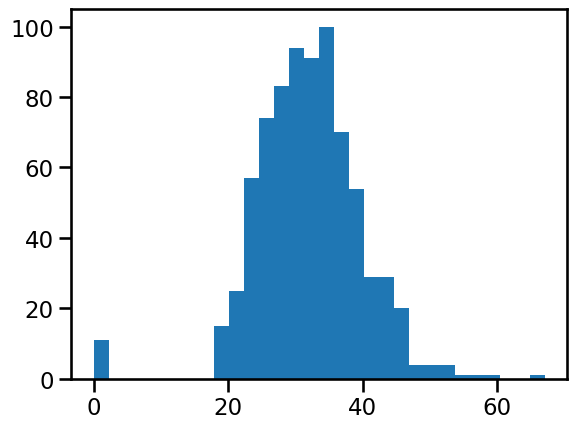

In [70]:
plt.hist(diab.BMI, bins=30)
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

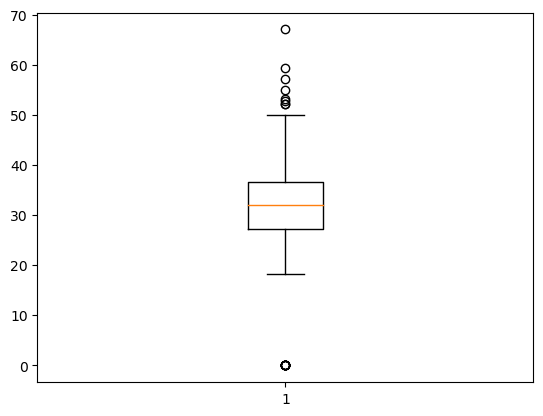

In [26]:
#Se observan outliers hacia la izquierda del histograma.Es imposible que BMI sea cero.
plt.boxplot(diab['BMI'])
plt.show()

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [77]:
diab_filtrado = diab.loc[diab['BMI']>diab['BMI'].quantile(0.01)]
diab_filtrado.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


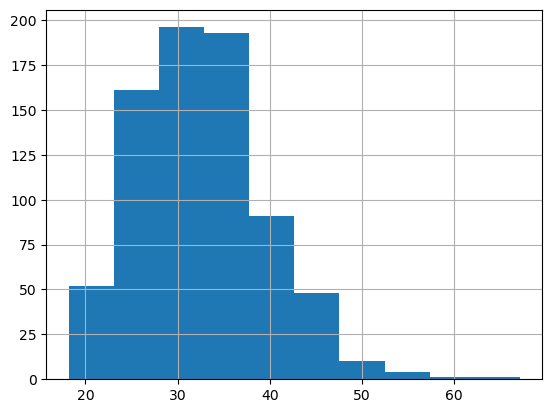

In [30]:
diab_filtrado.BMI.hist()
plt.show()

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

Podemos observar que los pacientes que tienen diabetes tienen, en promedio, un nivel más elevado de glucosa que aquellos que no.

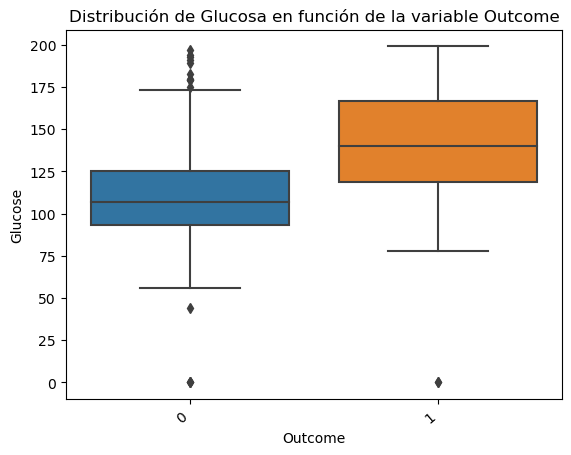

In [33]:
ay = sns.boxplot(x = diab_filtrado.Outcome, y = diab_filtrado.Glucose, data = diab_filtrado)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("Distribución de Glucosa en función de la variable Outcome")
plt.show()

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

Se observa una relación positiva, donde a mayor nivel de glucosa y de presión, mayor cantidad de casos de diabetes

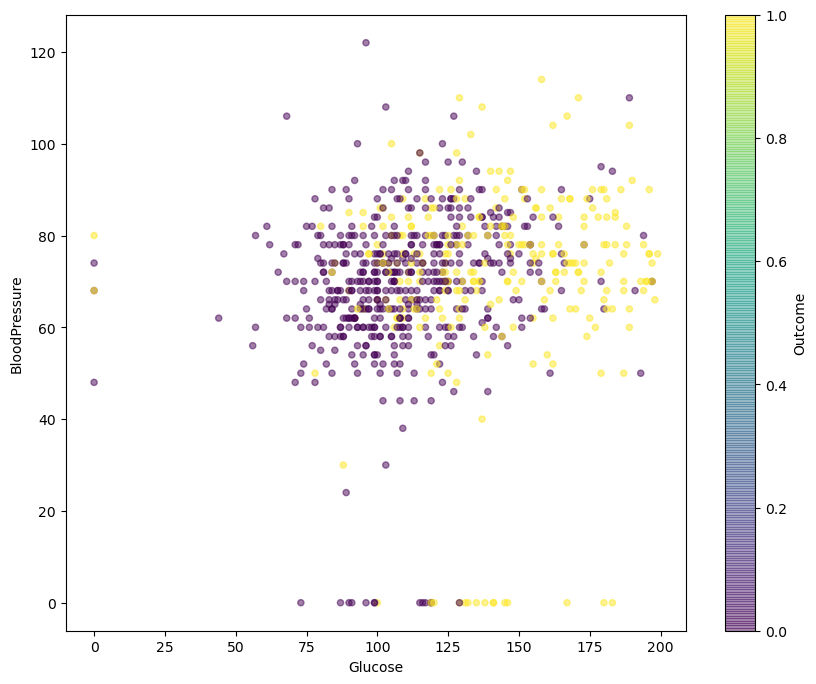

In [34]:
diab_filtrado.plot(kind='scatter', x='Glucose', y='BloodPressure', c='Outcome',
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(10,8))
plt.show()

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [78]:
diab_filtrado['Age'].astype(int)
diab_filtrado.loc[(diab_filtrado['Age'] > 0) & (diab_filtrado['Age'] < 30), 'Rango Etario']='Menor a 30 años'
diab_filtrado.loc[(diab_filtrado['Age'] >= 30) & (diab_filtrado['Age'] < 40), 'Rango Etario']='Entre 30 y 40 años'
diab_filtrado.loc[(diab_filtrado['Age'] >= 40), 'Rango Etario']='Mayor a 40 años'
diab_filtrado.head()

C:\Users\juan2\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\juan2\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\juan2\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango Etario
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40 años
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40 años
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40 años
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30 años
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40 años


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

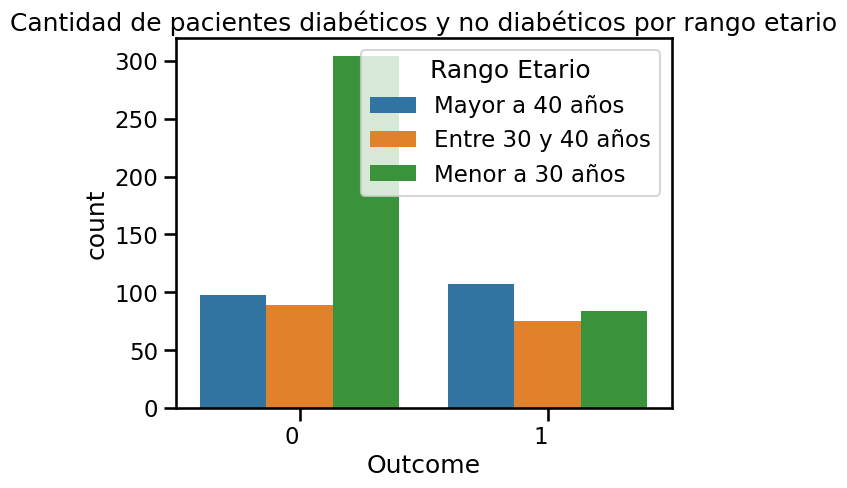

In [90]:
ax = sns.countplot(x="Outcome", data=diab_filtrado,hue='Rango Etario')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Cantidad de pacientes diabéticos y no diabéticos por rango etario")
plt.show()

#La conclusión es que la gente menor a 30 tiene menor probabilidad de ser diabética. 
#Sin embargo, del conjunto de personas diabéticas, el rango de edad se encuentra casi uniformemente distribuido. 